Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list anyone you collaborated with on this workbook

---

## Lab 5: Least Squares Regression (Single-Variable)
**This lab was distributed the week of September 28, 2020 and should be completed by Tuesday, October 6, 2020 at 11:59PM Pacific.**


Welcome to your fifth lab of the semester!<br>

This lab aims to get you started with linear regression in Python.

### Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Introduction and Data Source
In lecture we went over formulas to solve for the coefficients $\beta_0$ and $\beta_1$ in a single-variable least squares regression problem:

$y_i = \beta_0 + \beta_1 x_i + e_i$.

Those formulas are:

$
\hat{\beta}_0  =\bar{y} - \hat{\beta}_1\bar{x}\\
\hat{\beta}_1 = \frac{ \sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}
$

In this lab, we'll be applying least squares regression to data from the [California Department of Transportation (CalTrans)](https://data.ca.gov/dataset/caltrans-annual-vehicle-delay). 

**Question 1:** Load in the .csv file in the "data" folder and save it to a dataframe `df`.

In [3]:
# Student version
# df = ...
# df.head()

In [4]:
df = pd.read_csv('data/caltrans_hoursofdelay_2017.csv')
df.head()

,Route Number,Route Suffix,County,Vehicle Hours of Delay (VHD) Rank,Annual Vehicle Hours of Delay (VHD) at 35 miles per hour (mph),Annual Vehicle Miles Traveled (VMT),Number of Incidents,Incidents/ Day,Incidents/ million VMT
0,99,NaN,BUT,1,7372,59973595,834,2.28,13.91
1,50,NaN,ED,2,34070,614933130,1741,4.77,2.83
2,80,NaN,NEV,3,36132,522576590,1781,4.88,3.41
3,65,NaN,PLA,4,149952,311279662,1029,2.82,3.31
4,80,NaN,PLA,5,210066,1430481526,4727,12.95,3.30


This dataset reports freeway congestion in California, organized by county and route. For this exercise, we'll be looking specifically at the Annual Vehicle Miles Traveled (VMT) field, which represents the total number of miles traveled per vehicle on that route in that county, and the Incidents/ Day field, which represents the average number of traffic incidents per day for that route and county in 2017.

Let's create a model to predict the number of Incidents/Day (i.e., the target variable) as a function of annual VMT (i.e., the independent variable). 

**Question 2:** To start off with, create a scatter plot with Annual VMT on the x-axis and Incidents/Day on the y-axis. What can you say about the general relationship between these two variables?

*Note*: instead of typing out a long column name everytime you need to use it, you can create a variable that contains that column name as a string. For instance, rather than typing out `df["Annual Vehicle Miles Traveled (VMT)"]`, you can define a variable `vmt`:
```python
vmt = "Annual Vehicle Miles Traveled (VMT)"
df[vmt]
```
You can also just re-name the column names.

In [5]:
# YOUR CODE HERE

*Your observations here*

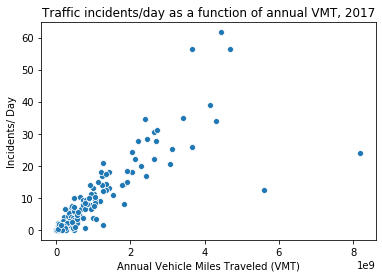

In [6]:
# Possible solution
vmt = "Annual Vehicle Miles Traveled (VMT)"
i_day = "Incidents/ Day"

sns.scatterplot(df[vmt], df[i_day])
plt.title("Traffic incidents/day as a function of annual VMT, 2017")
plt.show()

*There seems to be a general linear relationship between annual VMT and incidents/day (with 2 notable outliers at high VMT), where an increase in VMT leads to an increase in incidents/day.*

### Estimate the coefficients
**Question 3:** Write a function that returns the estimated $\beta_0$ and $\beta_1$ using the summation formulas from class (i.e., the formulas above in the lab notebook), taking the vectors of all $x$ and $y$ observations as input.

In [7]:
# Student version
# def get_betas(x,y):
#     # YOUR CODE HERE
#     return ...

In [8]:
# Possible solution
def get_betas(x,y):
    xbar = x.mean()
    ybar = y.mean()
    beta_1 = np.sum((x-xbar)*(y-ybar))/np.sum((x-xbar)**2)
    beta_0 = ybar - beta_1*xbar
    return(beta_0,beta_1)

**Question 4:** Use your function to estimate $\beta_0$ and $\beta_1$ for the independent and response variables of interest in the Caltrans data you loaded.  

In [9]:
# Student version
# # YOUR CODE HERE
# print('Beta values are', b0, 'and', b1)

In [10]:
### SOLUTION
(b0,b1) = get_betas(df[vmt],df[i_day])
print('Beta values are', b0, 'and', b1)

Beta values are 1.1214376813588869 and 7.72163871543741e-09


### Predict the target (dependent) variable

**Question 5:** Use your estimated coefficients to predict Incidents/Day ($\hat{y}$) for every observation of annual VMT ($x_i$).

In [11]:
y_hat = b0 + b1*df[vmt] # YOUR CODE HERE

In [12]:
assert len(y_hat) == len(df) # Your code should return a predicted value of y for every observation in the dataset

**Question 6:** Output a plot that overlays your regression line on a scatterplot of VMT vs. incidents per day. 

In [13]:
# student version
# YOUR CODE HERE

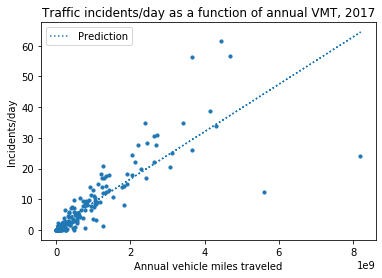

In [14]:
# solution
plt.scatter(df[vmt], df[i_day], s = 10)
plt.plot(df[vmt],y_hat, ":", label = "Prediction")
plt.title("Traffic incidents/day as a function of annual VMT, 2017")
plt.xlabel("Annual vehicle miles traveled")
plt.ylabel("Incidents/day")
plt.legend()
plt.show()

### Model estimation and prediction using sckit tools

We can (and will) also estimate coefficients and predict response variables using the Python package scikit-learn. As we move forward in this class, we will be developing more complicated models and using more than one independent variable. The scikit-learn toolbox gives us a way to run regression (and other!) models quickly and efficiently. Let's walk through an example using single-variable regression.

First, we need to set up some new dependencies.

In [15]:
# Install sklearn
! pip install sklearn

In [16]:
# Import packages

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

The `scikit-learn` package has a `linear_model` object upon which you can call `LinearRegression()` to generate a linear regression object:

`lm = linear_model.LinearRegression()`

`lm` takes as arguments to its `.fit()` method the arrays $X$ and $y$, where $X$ is a dataframe of independent variables and $y$ is a dataframe of the dependent variable, or our "target" data.

*Note*: The `scikit-learn` functions will only accept $X$ and $y$ as inputs if both dimensions of these arrays' respective shapes are explicitly defined. In other words, if $X$ and/or $y$ is one-dimensional, the `linear_model` functions will produce errors if either of these arrays has a `shape` of the form `(n,)`, where n is the number of elements in the array. Instead, one-dimensional arrays need to be reformatted to have the shape `(n,1)`. You'll have to get the values from your panda dataframe for $X$ and $y$, and then use the `.reshape()` method to get the right dimensions. Alternatively, `scikit-learn` will also accept an input if it takes the form of a pandas dataframe rather than a pandas series; for example, defining $X$ as `df[['column_name']]` is acceptable in `scikit-learn` syntax, but defining $X$ as `df['column name']` is not.

For example, we would initiate and fit a linear regression model for the CalTrans data as follows:

In [17]:
X = df[[vmt]] # define an array of independent variables
y = df[[i_day]] # define an array (usually one-dimension) of target variables
lm_incidents = linear_model.LinearRegression() # initiate a linear regression object
fit_incidents = lm_incidents.fit(X,y) # fit the linear regression object to your X and y data

In the code above, the `.fit()` method estimates the coefficients for our linear model. We can access the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ as follows:

In [18]:
beta0_hat =  fit_incidents.intercept_
beta1_hat = fit_incidents.coef_
print('beta0_hat:', beta0_hat)
print('beta1_hat:', beta1_hat) # If we had more than one x term, .coef_ would return more than one coefficient, i.e., beta1_hat, beta2_hat...

beta0_hat: [1.12143768]
beta1_hat: [[7.72163872e-09]]


**Question 7:** How do the estimates of $\hat{\beta}_0$ and $\hat{\beta}_1$ that we found using the `scikit-learn` tools compare to those we found using the linear regression equations?

*YOUR ANSWER HERE*

*They are the same.*

We can also use `scikit-learn` to predict the target variable. The `linear_model` object we initated and fit for the CalTrans data has a `.predict()` method, which takes in a matrix $X$ and returns a list of $\hat{y}$ values. 

In [19]:
y_pred = fit_incidents.predict(X)

Check that the values for y_pred equal the values for y_hat, at least the the 8th decimal place.

In [20]:
assert (np.round(y_pred,8) == np.round(y_hat.values.reshape(-1,1),8)).all() 

### Evaluate model performance (the cost function)

**Question 8:** Using the `y_hat` predicted values you developed in Question 5, calculate the error term $e_i$ (aka, the residual) for each pair of predictions and observations. The result for `error` should be a 1-dimensional array that has the same length as our number of observations. Then, create a scatter plot with the residual on the y-axis and Annual VMT on the x-axis. Overlay on your plot a dotted horizontal line that crosses the y-axis at zero.

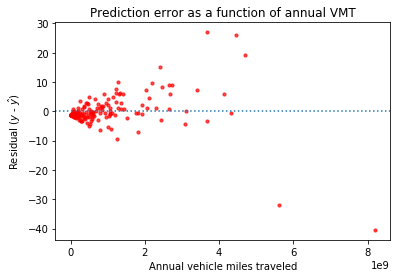

In [21]:
#YOUR CODE HERE

error = df[i_day] - y_hat

plt.scatter(df[vmt],error,color='r', s=10, alpha=0.7)
plt.axhline(linestyle=':')
plt.title("Prediction error as a function of annual VMT")
plt.xlabel("Annual vehicle miles traveled")
plt.ylabel("Residual ($y$ - $\hat{y}$)")
plt.show()

**Question 9:** Visually inspect your residual plot. Are there any regions of the x-domain in which your model seems to be systematically over- or under-estimating the response variable? Is this a sign of variance or bias in your model, and what is one strategy for correcting this issue?

*YOUR ANSWER HERE*

*Visually, it appears that our model is doing the best job (i.e., residuals are evenly distributed around zero) when annual VMT is low. As VMT increases above ~2e9, our model appears to consistently underestimate incidents per day. At very high VMT (>5e9), we don't really know whether our model is overestimating incidents per day because we only have two data points in that region of the domain. Systematic over- or under-estimation is a sign of bias, which can be corrected by increasing the flexibility of the model (e.g., by adding additional x terms).*

**Question 10** Calculate the mean square error (MSE) for your model using the formula below. Your result should be a single, non-negative value.

$
MSE  =\frac{1}{n} \sum_{i=1}^n e_i^2
$

*Hint:* Use the `error` array you created in Question 8.

In [22]:
# Student version
# MSE = ...
# print(MSE)

In [23]:
# Solution
MSE = (error**2).mean()
print(MSE)

34.99340761798194


Alternatively, you can use scikit-learn built-in functions to calculate MSE.

In [24]:
MSE = mean_squared_error(df[i_day], y_hat)
MSE

34.99340761798195

### Splitting the data into testing and training subsets
In the previous few questions, we didn't divide our data into training and testing sets - we fit the regression line to the full dataset, and tested its performance on that same full dataset. In this section we'll build a loop that splits our data into a testing and a training set and then creates and evaluates a model for each training set. 

As an optional (commented out) exercise, you can also examine the 95% confidence intervals for the beta coefficients we develop for each test/train iteration. To do that, you'll need some functions to estimate the residual standard error (RSE) and the standard error for $\beta_0$ and $\beta_1$. Recall the following formulas from ISLR:

$
RSE = \sqrt{(n-2)^{-1} * \sum_{i=1}^n e_i^2}\\
SE(\hat{\beta}_0)^2  = RSE^2 [\frac{1}{n} + \frac {x^2}{\sum_{i=1}^n(x_i-\bar{x})^2}]\\
SE(\hat{\beta}_1)^2 = \frac{RSE^2}{\sum_{i=1}^n(x_i-\bar{x})^2}
$ 

Luckily, we can adapt the functions Duncan developed for the asynchronous lectures to calculate RSE and the standard errors of the beta coefficients. In the code below, `e_array` is an array of residuals (errors), `n` is the number of observations, and `x` is the array of independent variable observations.

In [25]:
def ResidSE(e_array):
    return np.sqrt(np.sum(e_array**2)/(len(e_array)-2))

def StandErr_b0(RSE, n, x):
    xbar = np.mean(x)
    return np.sqrt(RSE**2*(1/n + xbar**2/np.sum((x - xbar)**2)))

def StandErr_b1(RSE, n, x):
    xbar = np.mean(x)
    return np.sqrt(RSE**2*(1/np.sum((x - xbar)**2)))

**Question 11:** Using the functions above, create a loop that does the following 100 times:

1 - Randomly selects the training data from the full dataset<br>
2 - Estimates the beta values of the training set, using the `get_beta` function you've defined<br>
3 - Tests the model performance (by calculating MSE) against the testing data<br>
4 - [Optional] Computes the residual standard error, standard error, and 95% confidence intervals for the estimated beta values<br>

For each iteration through the loop, we'll save the beta values, the error array, and the MSE (as well as the standard error, and the confidence intervals if you do the optional exercise). The skeleton code below will get you started.

In [26]:
# set the parameters for number of iterations and size of the testing and training sets
n_iter = 100 # number of iterations
n_train = int(np.round(len(df[vmt])*0.7)) # number of training data points is equal to 70% of the observations, rounded to the nearest integer
n_test = int(len(df[vmt]) - n_train) # number of testing data points

# initialize a bunch of arrays populated with np.nan to store various output values produced during each iteration
betas = np.full((n_iter,2),np.nan) # each row will contain the estimated b0 and b1 for each test/train iteration
error = np.full((n_iter, n_test),np.nan) # each row will contain the error values associated with the testing dataset for a given test/train iteration
MSE = np.full(n_iter, np.nan) # each value will be the mean squared error for a given test/train iteration
RSE = np.full(n_iter, np.nan) # each value will be the residual standard error for a given test/train iteration

## Optional
# SEb0 = np.full(n_iter, np.nan) # each value is the standard error of estimated b0 for a given test/train iteration
# SEb1 = np.full(n_iter, np.nan) # each value is the standard error of estimated b1 for a given test/train iteration 
# CIb0 = np.full((n_iter,2),np.nan) # each row holds the upper and lower bounds for the 95% confidence interval of b0 for a given test/train iteration 
# CIb1 = np.zeros((n_iter,2)) # each row holds the upper and lower bounds for the 95% confidence interval of b1 for a given test/train iteration 


for i in range(n_iter):
    train_indx = np.random.choice(len(df[vmt]), size = n_train, replace = False)
    test_indx = np.setdiff1d(np.arange(len(df[vmt])),train_indx)
 
    
    # compute b0 and b1
    # YOUR CODE HERE
    betas[i,:] = get_betas(df[vmt][test_indx], df[i_day][test_indx])
    
    # estimate y_hat for every observation in the test dataset
    # YOUR CODE HERE
    y_hat = betas[i,0] + betas[i,1]*df[vmt][test_indx]
    
    # compute the MSE
    # YOUR CODE HERE
    e_array = df[i_day][test_indx]-y_hat
    error[i,:] = e_array

    MSE[i] = ((error[i,:])**2).mean()
    

    ## Optional
#     # compute the residual standard error (required for computing coefficient S.E.)
#     RSE[i] = ResidSE(e_array)
    
#     # compute coefficient S.E.
#     SEb0[i] = StandErr_b0(RSE[i], len(e_array), df[vmt][test_indx])
#     SEb1[i] = StandErr_b1(RSE[i], len(e_array), df[vmt][test_indx])
    
#     # compute 95% confidence intervals.
#     CIb0[i,:] = [betas[i,0]-2*SEb0[i], betas[i,0]+2*SEb0[i]]
#     CIb1[i,:] = [betas[i,1]-2*SEb1[i], betas[i,1]+2*SEb1[i]]

### Parameter Uncertainty

**Question 12:** Plot two KDE distributions, one for each coefficient $\hat{\beta}_0$ and $\hat{\beta}_1$. Using `sns.kdeplot()` and label your plots.

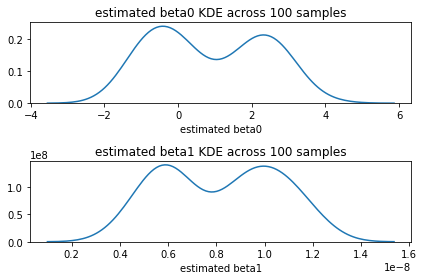

In [27]:
#YOUR CODE HERE

#Plot the KDE plot for b0
plt.subplot(2,1,1)

sns.kdeplot(betas[:,0])

plt.xlabel('estimated beta0')
plt.title('estimated beta0 KDE across 100 samples')

#Plot the KDE plot for b1
plt.subplot(2,1,2)

sns.kdeplot(betas[:,1])

plt.xlabel('estimated beta1')
plt.title('estimated beta1 KDE across 100 samples')
plt.tight_layout()

### Model Evaluation

**Question 13** Plot a distribution of your mean squared error using `sns.kdeplot()`.

In [28]:
# student version
# YOUR CODE HERE

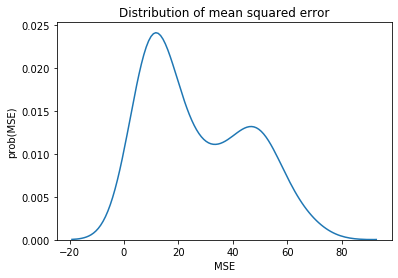

In [29]:
# solution
sns.kdeplot(MSE)
plt.title("Distribution of mean squared error")
plt.xlabel("MSE")
plt.ylabel("prob(MSE)");

**Question 14:** What do you notice about the KDE distributions for $\hat{\beta}_0$, $\hat{\beta}_1$, and MSE? Can you explain their shapes, based on what you've observed about the dataset?

*YOUR ANSWER HERE*

*Observations: there are two "bumps" in the KDEs for estimated beta0, estimated beta1, and MSE. E.g., in the MSE plot below, the bumps occur around 20 and one around 50. This is probably a function of whether or not the training data set included some of the outlier values that had higher VMTs - if those values were in the training set but were not in the testing set, the result would be a higher MSE.*

**Question 15:** Plot a scatter plot of all observations, overlayed with all 100 linear regression lines. We can plot the regression lines by using the array `betas` to calculate their value at two points, 0 and the maximum $x$ value (`df[vmt].max()`) - the skeleton code below gets you started by defining those two $x$ values. Play around with the linestyles, scatter plot marker sizes, and linewidths to get a legible plot. How do the regression lines relate to the KDE plots you created in Question 12?

In [30]:
# student version
# x = np.array([0, df[vmt].max()]) # two x values, at which y_hat can be calculated

# plt.figure(figsize = (10,5))

# plt.scatter(...)

# for i in range(n_iter):
#     y_hat = ...
#     plt.plot(...)
    
# plt.title(...)
# plt.xlabel(...)
# plt.ylabel(...)
# plt.show()

*YOUR ANSWER HERE*

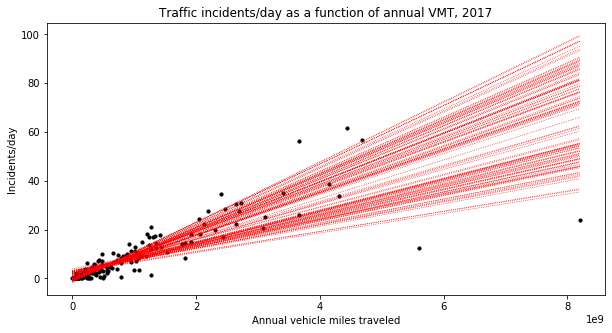

In [31]:
# solution
# solution
x = np.array([0, df[vmt].max()])

plt.figure(figsize = (10,5))

plt.scatter(df[vmt], df[i_day], s = 10, c="black")

MSE_norm = MSE/MSE.max()

for i in range(n_iter):
    y_hat = betas[i,0] + betas[i,1]*x
    plt.plot(x,y_hat, ":", 
             c = "red", 
             linewidth = 0.7)
    
plt.title("Traffic incidents/day as a function of annual VMT, 2017")
plt.xlabel("Annual vehicle miles traveled")
plt.ylabel("Incidents/day")
plt.show()

*The lines with a smaller slope (i.e., $\hat{\beta}_1$) correspond to those on the leftmost "bump" on the KDE curve for $\hat{\beta}_1$ and are more influenced by outliers. Similarly, the lines with a higher y-intercept (i.e., $\hat{\beta}_0$ correspond to the rightmost bump on the KDE curve for $\hat{\beta}_0$.*

# Hooray, you're done! 

Please remember to submit your lab work, after clicking Kernel -> Restart & Run All, in .html and .ipynb format on bCourses.